# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [20]:
# YOUR CODE HERE

# Load the dataset and drop missing values
wine_quality = pd.read_csv("https://github.com/epistasislab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t").dropna()

# Select only the first 10 columns for analysis
# .iloc[:, :10] selects all rows (:) and columns from index 0 up to (but not including) 10
wine_quality_10_cols = wine_quality.iloc[:, :10]

# Show a random sample of 10 rows from the limited dataset
wine_quality_10_cols.sample(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
1037,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56
918,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72
414,8.8,0.520,0.34,2.7,0.087,24.0,122.0,0.99820,3.26,0.61
931,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65
568,9.8,0.500,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79
187,7.7,0.705,0.10,2.6,0.084,9.0,26.0,0.99760,3.39,0.49
1192,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
823,6.7,0.540,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64
596,12.4,0.400,0.51,2.0,0.059,6.0,24.0,0.99940,3.04,0.60


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [24]:
# YOUR CODE HERE

print(wine_quality_10_cols.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']


YOUR ANSWERS HERE

Columns in the Dataset:  
1. Fixed acidity: The non-volatile acids (like tartaric acid) that don't evaporate easily. It contributes to the overall sourness and structure of the wine.
2. Volatile acidity: The amount of acetic acid (vinegar) in the wine. High levels are undesirable and can lead to an unpleasant, vinegar-like taste.
3. Citric acid: A small amount of this acid is often added to wines to increase freshness and flavor.
4. Residual sugar: The amount of sugar left in the wine after fermentation stops. It can range from dry (low sugar) to sweet (high sugar).
5. Chlorides: The amount of salt in the wine. A higher concentration can indicate a salty taste, often due to the water source used in winemaking.
6. Free sulfur dioxide: The unbound portion of SO2​ that exists in equilibrium. It acts as an antimicrobial and antioxidant, helping to preserve the wine's freshness.
7. Total sulfur dioxide: The total amount of SO2​ present, both free and bound. It's a key preservative in winemaking.
8. Density: The mass per unit volume of the wine, related to the concentration of alcohol and sugar. It's often used to measure the alcohol content.
9. pH: A scale from 0 to 14 indicating how acidic or basic the wine is. Lower pH means higher acidity and a more tart taste.
10. Sulphates: The concentration of potassium sulphate, which is often added to the wine. It can act as a microbial agent and affects the flavor balance.
11. Alcohol: The percentage of ethyl alcohol present in the wine. Higher alcohol content generally contributes to the body and mouthfeel.
12. Quality: (Target Variable) The final sensory score, typically rated by human tasters on a scale from 0 to 10 (though the scores in this dataset range from 3 to 8).

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

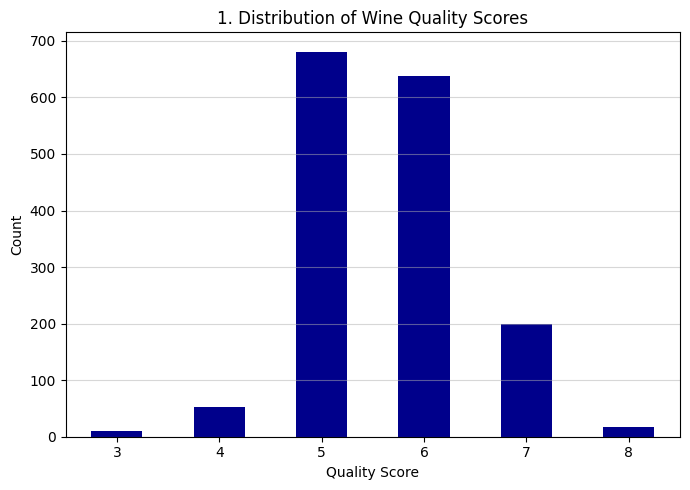

<Figure size 800x600 with 0 Axes>

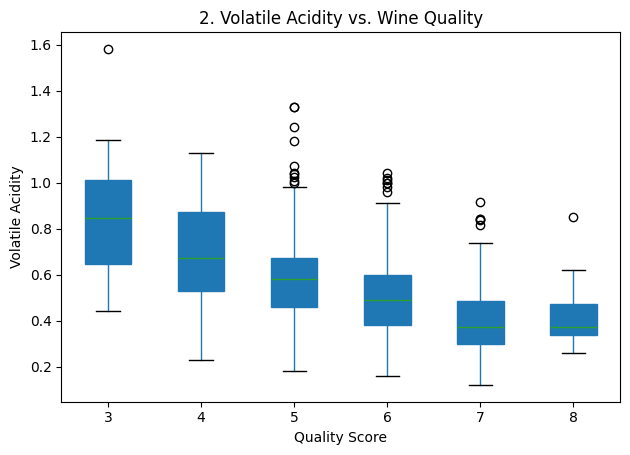

/tmp/ipykernel_9787/4008391965.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


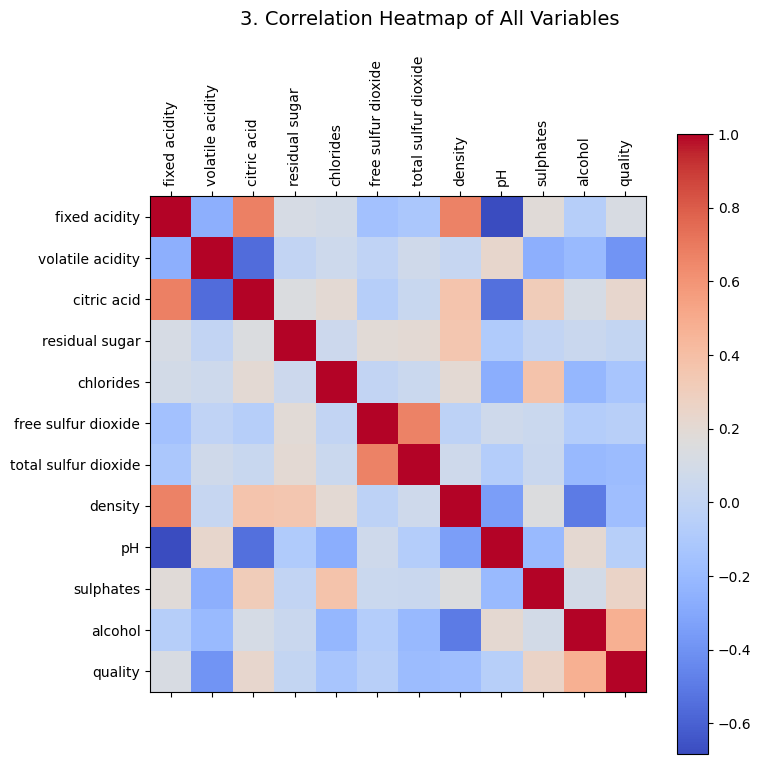

In [39]:
# YOUR CODE HERE

# Reload the full dataset and handle missing values
# The full dataset has 12 columns, where the last one is 'quality'. 
# Add the 'quality' column back for meaningful analysis, as it is the target variable and is typically the 11th column. The full dataset used in Problem 1 contained 11 columns in total, but only the first 10 were selected. For EDA, we must include the target variable.
wine_quality = pd.read_csv("https://github.com/epistasislab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep='\t').dropna()

# Select the first 11 columns for analysis (10 features + 'quality').
if wine_quality.shape[1] > 11:
    wine_data = wine_quality.iloc[:, :11].copy()
else:
    wine_data = wine_quality.copy()

# Ensure 'quality' column is available.
if 'quality' not in wine_data.columns:
    last_col = wine_quality.columns[-1]
    if wine_quality[last_col].dtype in ['int64', 'float64']:
         wine_data['quality'] = wine_quality[last_col]

# --- CHART 1: Distribution of Wine Quality Scores (Bar Chart) ---
plt.figure(figsize=(7, 5))
# Use pandas value_counts().plot(kind='bar')
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('1. Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# --- CHART 2: Relationship between Volatile Acidity and Quality (Boxplot) ---
plt.figure(figsize=(8, 6))
# Use pandas .boxplot() method
wine_data.boxplot(column='volatile acidity', by='quality', grid=False, patch_artist=True)
plt.suptitle('') # Suppress the automatic suptitle
plt.title('2. Volatile Acidity vs. Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Volatile Acidity')
plt.tight_layout()
plt.show()

# --- CHART 3: Correlation Heatmap of Features (Matshow) ---
plt.figure(figsize=(8, 8))
corr = wine_data.corr()
plt.matshow(corr, cmap='coolwarm', fignum=plt.gcf().number)
plt.colorbar()
column_names = corr.columns.tolist()
plt.xticks(range(len(column_names)), column_names, rotation=90)
plt.yticks(range(len(column_names)), column_names)
plt.suptitle('3. Correlation Heatmap of All Variables', fontsize=14, y=1.02)
plt.tight_layout() 
plt.subplots_adjust(top=0.95) # Manually pushes content down from the top
plt.show()


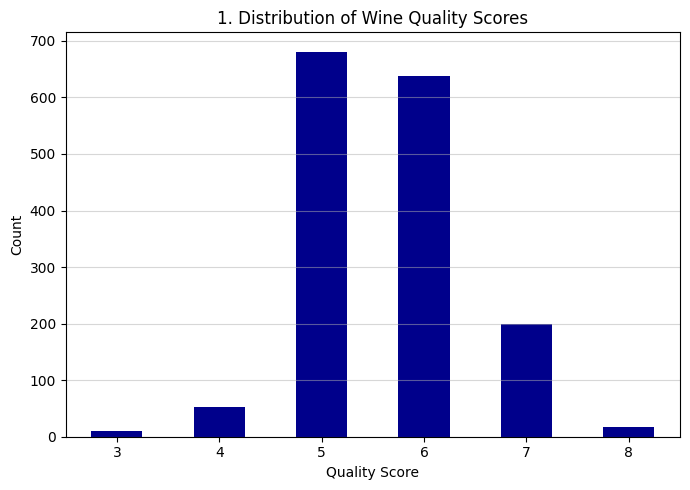

In [36]:
# --- CHART 1: Distribution of Wine Quality Scores (Bar Chart) ---
plt.figure(figsize=(7, 5))
# Use pandas value_counts().plot(kind='bar')
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('1. Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

1. Distribution of Wine Quality Scores (Bar Chart)

Noteworthy:This bar chart, representing the frequency of each quality score, clearly shows the dataset is severely imbalanced. The bulk of the red wines are rated as Average (scores 5 and 6), which account for over $80\%$ of all observations. Conversely, wines rated as Poor (3 and 4) or Excellent (7 and 8) are rare. This imbalance means any model built on this data will inherently be biased toward predicting scores 5 or 6, making it difficult to accurately identify truly high- or low-quality wines.

<Figure size 800x600 with 0 Axes>

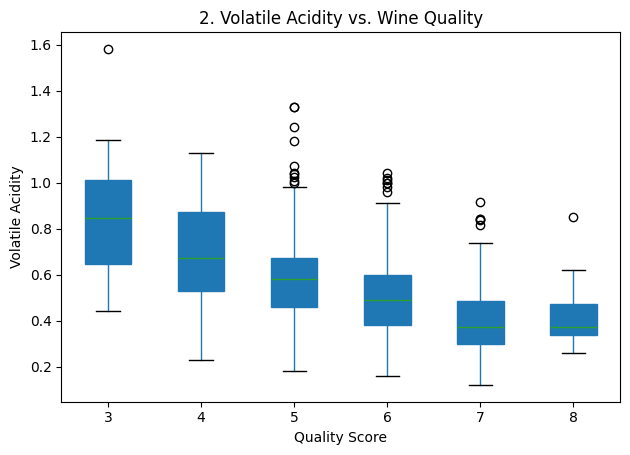

In [37]:
# --- CHART 2: Relationship between Volatile Acidity and Quality (Boxplot) ---
plt.figure(figsize=(8, 6))
# Use pandas .boxplot() method
wine_data.boxplot(column='volatile acidity', by='quality', grid=False, patch_artist=True)
plt.suptitle('') # Suppress the automatic suptitle
plt.title('2. Volatile Acidity vs. Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Volatile Acidity')
plt.tight_layout()
plt.show()


2. Volatile Acidity vs. Wine Quality (Boxplot)

Noteworthy: The boxplot, which visualizes the distribution of volatile acidity across different quality scores, demonstrates a distinct pattern: as wine quality increases, volatile acidity levels decrease. This is evident as the median (the line inside the box) consistently drops from score 3 to score 8. This confirms that volatile acidity, which is often associated with a vinegar-like taste in high concentrations, is a strong negative predictor of red wine quality. Its relationship with the target is likely one of the most critical factors in the dataset.

/tmp/ipykernel_9787/2028834980.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


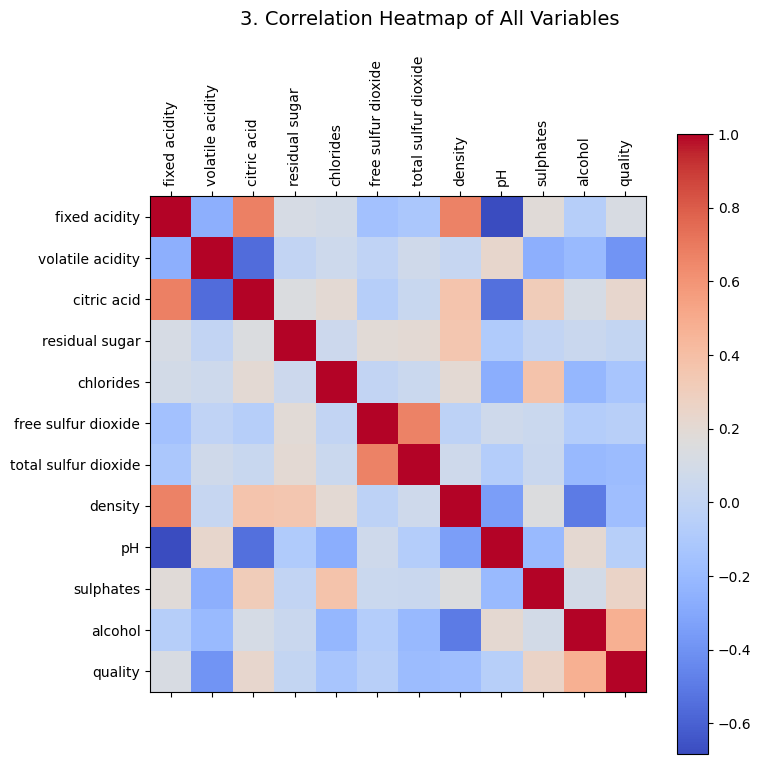

In [38]:
# --- CHART 3: Correlation Heatmap of Features (Matshow) ---
plt.figure(figsize=(8, 8))
corr = wine_data.corr()
plt.matshow(corr, cmap='coolwarm', fignum=plt.gcf().number)
plt.colorbar()
column_names = corr.columns.tolist()
plt.xticks(range(len(column_names)), column_names, rotation=90)
plt.yticks(range(len(column_names)), column_names)
plt.suptitle('3. Correlation Heatmap of All Variables', fontsize=14, y=1.02)
plt.tight_layout() 
plt.subplots_adjust(top=0.95) # Manually pushes content down from the top
plt.show()


3. Correlation Heatmap of All Variables (Matshow)

Noteworthy: The correlation map uses color intensity to represent the strength and direction of linear relationships between all variables. Two key findings are:
- Strong Multicollinearity: There is a very intense red square indicating an extremely strong positive correlation between 'free sulfur dioxide' and 'total sulfur dioxide'. This high correlation suggests that these two features convey largely redundant information. In a modeling context, keeping both variables could introduce multicollinearity issues, which can destabilize model coefficient estimates.
 - Key Predictors for Quality: The last row/column (Quality) confirms that 'volatile acidity' and 'alcohol' are among the strongest predictors. Volatile acidity shows a large negative correlation (blue), and alcohol shows a large positive correlation (red), reinforcing the idea that higher quality red wine tends to have less volatile acidity and a higher alcohol content.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [47]:
# YOUR CODE HERE






YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE